<a href="https://colab.research.google.com/github/lavigne12/baseballstats/blob/main/SIE_558_Final_Lavigne_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install JDK
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#download the Spark 3.3.1 binary distribution
!wget -q https://dlcdn.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
#unzip the tar file
!tar xf spark-3.5.0-bin-hadoop3.tgz

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.5.0-bin-hadoop3'

#installing pyspark, the Python API for Apache Spark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=db5be087eaea67cc0bb9a79add6d8c9ca87a658ca3dd281c0f43e94366221ea1
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import pandas as pd

file_path1 = "/content/dog_test1.csv"
file_path2 = "/content/dog_test2.csv"
file_path3 = "/content/dog_test3.csv"
file_path4 = "/content/dog_test4.csv"

df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)
df3 = pd.read_csv(file_path3)
df4 = pd.read_csv(file_path4)

df1

,Volume Intensity,Seconds Elapsed,Timestamp
0,0.0,1,2023-12-05 06:46:46.147
1,0.0,2,2023-12-05 06:46:47.151
2,0.0,3,2023-12-05 06:46:48.154
3,0.0,4,2023-12-05 06:46:49.153
4,0.0,5,2023-12-05 06:46:50.157
...,...,...,...
28795,0.0,28796,2023-12-05 14:48:02.586
28796,0.0,28797,2023-12-05 14:48:03.588
28797,0.0,28798,2023-12-05 14:48:04.593
28798,0.0,28799,2023-12-05 14:48:05.596


In [ ]:
#convert to string, get rid of negative sign, and convert back to float
df1['Volume Intensity'] = df1['Volume Intensity'].astype(str)
df1['Volume Intensity'] = df1['Volume Intensity'].str.replace('-','')
df1['Volume Intensity'] = df1['Volume Intensity'].astype(float)

df2['Volume Intensity'] = df2['Volume Intensity'].astype(str)
df2['Volume Intensity'] = df2['Volume Intensity'].str.replace('-','')
df2['Volume Intensity'] = df2['Volume Intensity'].astype(float)


df3['Volume Intensity'] = df3['Volume Intensity'].astype(str)
df3['Volume Intensity'] = df3['Volume Intensity'].str.replace('-','')
df3['Volume Intensity'] = df3['Volume Intensity'].astype(float)


df4['Volume Intensity'] = df4['Volume Intensity'].astype(str)
df4['Volume Intensity'] = df4['Volume Intensity'].str.replace('-','')
df4['Volume Intensity'] = df4['Volume Intensity'].astype(float)



In [ ]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'])

#Function to filter data by timestamp hour and total each intensity in that hour
def filter_and_sum_volume(df, hour):
  filtered_df = df[df['Timestamp'].dt.hour == hour]
  total_volume_intensity = filtered_df['Volume Intensity'].sum()
  return total_volume_intensity

#Hours to sum
all_hours = [7,8,9,10,11,12,13]

#create dictionary to store data
total_volume = {}

#loop through all the hours and total the intensity in each dataframe.
for hour in all_hours:
    total_volume[f'Total Volume Intensity for Hour {hour} O Clock'] = {
        'df1': filter_and_sum_volume(df1, hour),
        'df2': filter_and_sum_volume(df2, hour),
        'df3': filter_and_sum_volume(df3, hour),
        'df4': filter_and_sum_volume(df4, hour),
    }

total_volume_df = pd.DataFrame(total_volume)

total_volume_df

,Total Volume Intensity for Hour 7 O Clock,Total Volume Intensity for Hour 8 O Clock,Total Volume Intensity for Hour 9 O Clock,Total Volume Intensity for Hour 10 O Clock,Total Volume Intensity for Hour 11 O Clock,Total Volume Intensity for Hour 12 O Clock,Total Volume Intensity for Hour 13 O Clock
df1,109234.0,0.0,57618.0,7034.0,0.0,755286.0,1271096.0
df2,63993.0,2560.0,1424515.0,907919.0,1510713.0,445724.0,5554.0
df3,0.0,135200.0,393961.0,303081.0,9078.0,236696.0,109393.0
df4,52996.0,0.0,0.0,0.0,472592.0,0.0,314.0


<ipython-input-16-cda0b28f3d56>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(total_volume_df_transposed.index, rotation=45, ha='right')


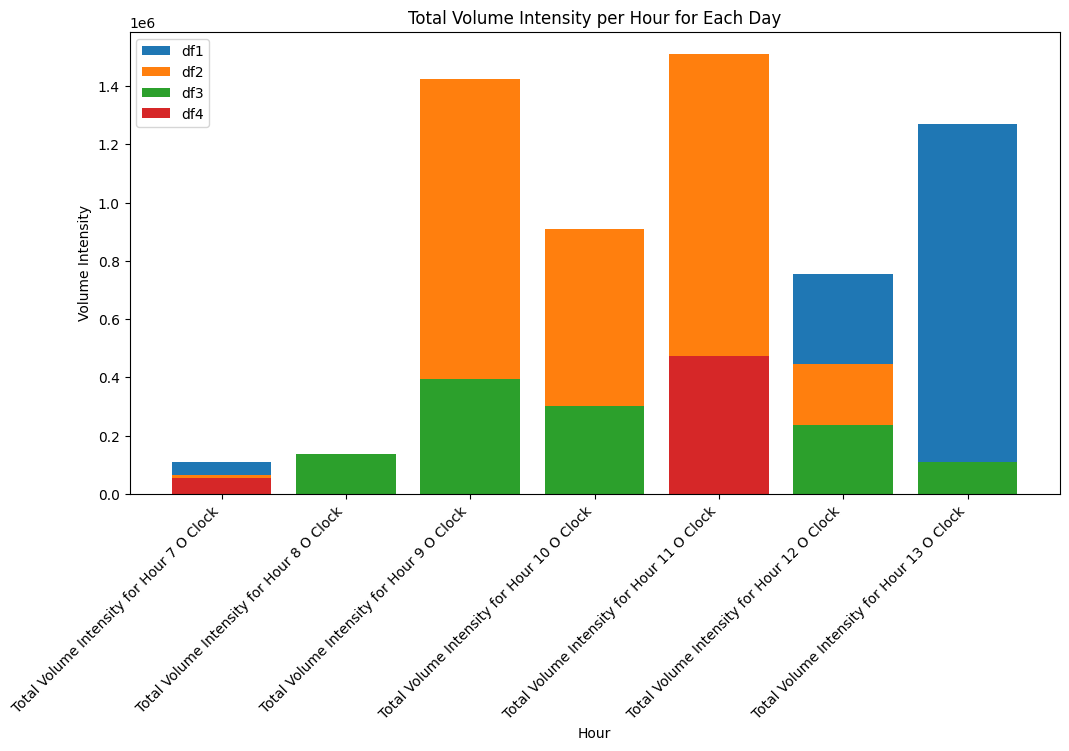

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

total_volume_df_transposed = total_volume_df.T

fig,ax = plt.subplots(figsize=(12,6))

for df_name in total_volume_df_transposed.columns:
    ax.bar(total_volume_df_transposed.index, total_volume_df_transposed[df_name], label=df_name)

ax.set_xlabel('Hour')
ax.set_ylabel('Volume Intensity')
ax.set_title('Total Volume Intensity per Hour for Each Day')
ax.legend()

ax.set_xticklabels(total_volume_df_transposed.index, rotation=45, ha='right')


plt.show()

In [ ]:
def calculate_average_volume(df, hour):
    filtered_df = df[df['Timestamp'].dt.hour == hour]

    seconds_in_hour = 3600
    total_volume_intensity = filtered_df['Volume Intensity'].sum()

    #calculate the average number of times intesnity was broken in an hour
    average_volume_intensity = total_volume_intensity / seconds_in_hour
    return average_volume_intensity

all_hours = [7, 8, 9, 10, 11, 12, 13]

average_volume = {}

for hour in all_hours:
    average_volume[f'Average Volume Intensity for Hour {hour} O Clock'] = {
        'df1': calculate_average_volume(df1, hour),
        'df2': calculate_average_volume(df2, hour),
        'df3': calculate_average_volume(df3, hour),
        'df4': calculate_average_volume(df4, hour),
    }

average_volume_df = pd.DataFrame(average_volume)

average_volume_df

,Average Volume Intensity for Hour 7 O Clock,Average Volume Intensity for Hour 8 O Clock,Average Volume Intensity for Hour 9 O Clock,Average Volume Intensity for Hour 10 O Clock,Average Volume Intensity for Hour 11 O Clock,Average Volume Intensity for Hour 12 O Clock,Average Volume Intensity for Hour 13 O Clock
df1,30.342778,0.000000,16.005000,1.953889,0.000000,209.801667,353.082222
df2,17.775833,0.711111,395.698611,252.199722,419.642500,123.812222,1.542778
df3,0.000000,37.555556,109.433611,84.189167,2.521667,65.748889,30.386944
df4,14.721111,0.000000,0.000000,0.000000,131.275556,0.000000,0.087222


<ipython-input-23-b1c3e4712f2d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(average_volume_df_transposed.index, rotation=45, ha='right')


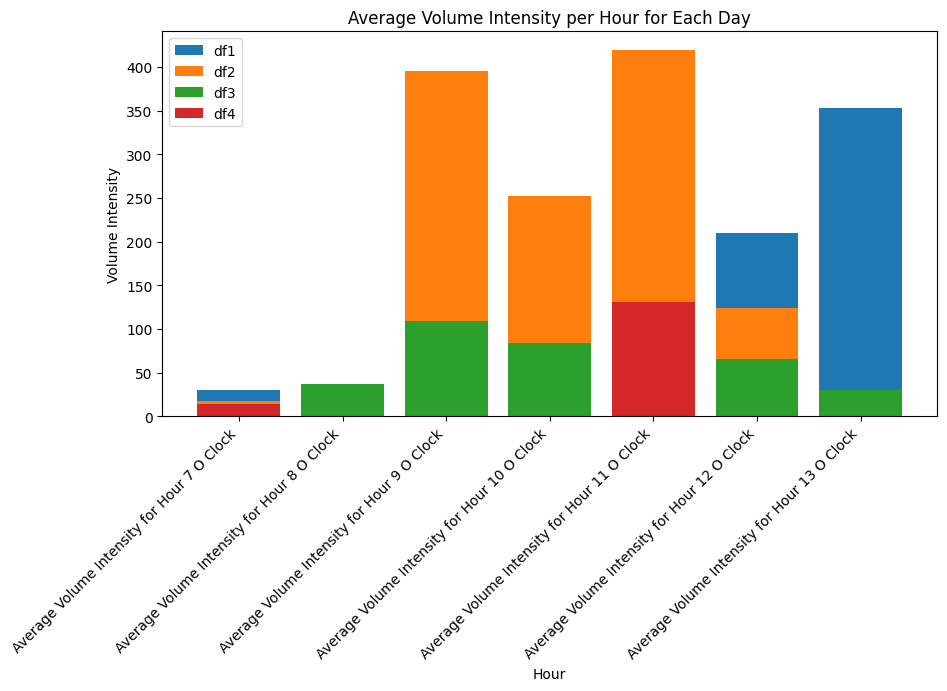

In [ ]:
average_volume_df_transposed = average_volume_df.T

fig,ax = plt.subplots(figsize=(10,5))

for df_name in average_volume_df_transposed.columns:
    ax.bar(average_volume_df_transposed.index, average_volume_df_transposed[df_name], label=df_name)

ax.set_xlabel('Hour')
ax.set_ylabel('Volume Intensity')
ax.set_title('Average Volume Intensity per Hour for Each Day')
ax.legend()

ax.set_xticklabels(average_volume_df_transposed.index, rotation=45, ha='right')


plt.show()